# Três Distribuições Fundamentais: Binomial, Gaussiana e Poisson

In [8]:
import numpy as np                              # Para operações numéricas
import pandas as pd                             # Para manipulação de dados
from scipy.stats import binom, norm, poisson    # Importação das distribuições binomial, guassiana e Poisson

import matplotlib.pyplot as plt                 # Para a criação de gráficos
from matplotlib_inline import backend_inline    # Para configurar a saída dos gráficos

# Configuração para que os gráficos sejam exibidos no formato SVG
backend_inline.set_matplotlib_formats("svg")

# Atualização das configurações padrão do matplotlib para melhorar a estética dos gráficos
plt.rcParams.update({
    "xtick.top": True,              # Ativa os ticks superiores no eixo X
    "ytick.right": True,            # Ativa os ticks à direita no eixo Y
    "xtick.direction": "in",        # Define a direção dos ticks do eixo X para dentro
    "ytick.direction": "in",        # Define a direção dos ticks do eixo Y para dentro
    "font.size": 12,                # Define o tamanho da fonte
    "font.family": "Lato",          # Define a família da fonte
    "axes.labelsize": 12,           # Define o tamanho da fonte dos rótulos dos eixos
    "axes.titlesize": 12,           # Define o tamanho da fonte dos títulos dos gráficos
    "legend.fontsize": 10,          # Define o tamanho da fonte das legendas
    "xtick.labelsize": 10,          # Define o tamanho da fonte dos labels no eixo X
    "ytick.labelsize": 10,          # Define o tamanho da fonte dos labels no eixo Y
    "xtick.minor.visible": True,    # Torna visíveis os ticks menores no eixo X
    "ytick.minor.visible": True     # Torna visíveis os ticks menores no eixo Y
})

## A Distribuição Binomial

### Derivação da Distribuição Binomial

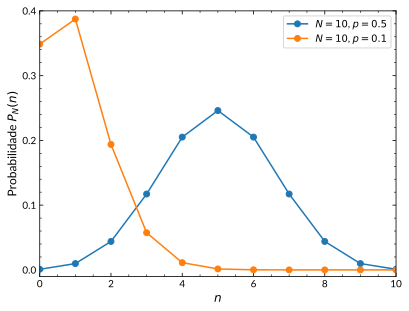

In [4]:
N: int = 10         # Número total de tentativas
p1: float = 0.5     # Probabilidade de sucesso no primeiro cenário
p2: float = 0.1     # Probabilidade de sucesso no segundo cenário

# Criação de um array com possíveis valores de sucesso (de 0 a N)
n: np.ndarray = np.arange(0, N + 1, 1)

# Cálculo das funções de massa de probabilidade para ambos os cenários
fmp1: np.ndarray = binom.pmf(n, N, p1)  # FMP para o primeiro cenário
fmp2: np.ndarray = binom.pmf(n, N, p2)  # FMP para o segundo cenário

# Configuração do gráfico
_, ax = plt.subplots()
ax.plot(n, fmp1, "-o", label=f"$N = {N}$, $p = {p1}$")  # Plotagem da FMP para p1
ax.plot(n, fmp2, "-o", label=f"$N = {N}$, $p = {p2}$")  # Plotagem da FMP para p2

# Configurações adicionais do gráfico
ax.set(xlabel="$n$", ylabel="Probabilidade $P_N(n)$")  # Definindo rótulos dos eixos
ax.axis([0, N, -0.01, 0.4])                            # Definindo limites dos eixos
ax.set_yticks(np.arange(0, 0.5, 0.1))                  # Configurando ticks no eixo y

plt.legend()
plt.savefig("../../tex-statistics/Figuras/3-1.pdf", bbox_inches="tight");

## A Distribuição Guassiana

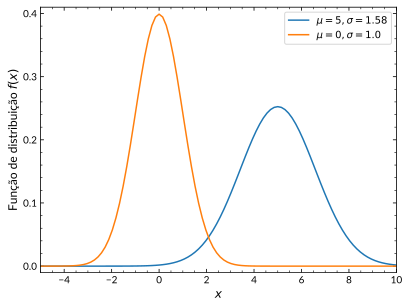

In [9]:
N: int = 10             # Número de amostras
mu1: int = 5            # Média para a primeira distribuição normal
mu2: int = 0            # Média para a segunda distribuição normal
sigma1: float = 1.58    # Desvio padrão para a primeira distribuição normal
sigma2: float = 1.0     # Desvio padrão para a segunda distribuição normal

# Geração de um conjunto de valores para os quais a FDP será calculada
x: np.ndarray = np.linspace(-5, 10, 100)

# Cálculo das FDPs gaussianas
normal1: np.ndarray = norm.pdf(x, loc=mu1, scale=sigma1)  # FDP para a primeira distribuição
normal2: np.ndarray = norm.pdf(x, loc=mu2, scale=sigma2)  # FDP para a segunda distribuição

# Criação de um subplot para os gráficos
_, ax = plt.subplots()

# Plotagem das FDPs
ax.plot(x, normal1, label=f"$\mu = {mu1}, \sigma = {sigma1}$")
ax.plot(x, normal2, label=f"$\mu = {mu2}, \sigma = {sigma2}$")

# Configuração dos rótulos dos eixos e limites do gráfico
ax.set(xlabel="$x$", ylabel="Função de distribuição $f(x)$")
ax.axis([-5, 10, -0.01, 0.41])
ax.set_yticks(np.arange(0, 0.5, 0.1))

plt.legend()
plt.savefig("../../tex-statistics/Figuras/3-2.pdf", bbox_inches="tight");

## A Distribuição de Poisson

### Momentos e Propriedades da Distribuição de Poisson

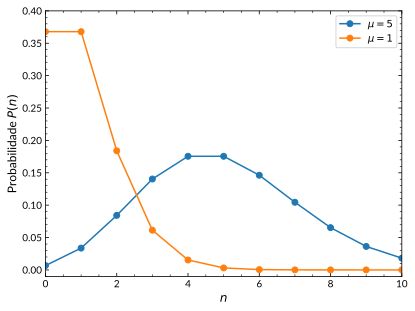

In [11]:
# Definição dos valores para n, representando o número de ocorrências
n: np.ndarray = np.arange(0, 11)

# Médias para as distribuições de Poisson
mu1: int = 5  # Média para a primeira distribuição
mu2: int = 1  # Média para a segunda distribuição

# Cálculo das funções de massa de probabilidade para ambas as médias
poisson1: np.ndarray = poisson.pmf(n, mu=mu1)  # FMP para mu1
poisson2: np.ndarray = poisson.pmf(n, mu=mu2)  # FMP para mu2

# Criação de um subplot para os gráficos
_, ax = plt.subplots()

# Plotagem das FMPs para cada média
ax.plot(n, poisson1, "-o", label=f"$\mu = {mu1}$") 
ax.plot(n, poisson2, "-o", label=f"$\mu = {mu2}$") 

# Configuração dos rótulos dos eixos e limites do gráfico
ax.set(xlabel="$n$", ylabel="Probabilidade $P(n)$")
ax.axis([0, 10, -0.01, 0.4])

plt.legend()
plt.savefig("../../tex-statistics/Figuras/3-3.pdf", bbox_inches="tight");

## Comparação das Distribuições Binomial, Gaussiana e de Poisson

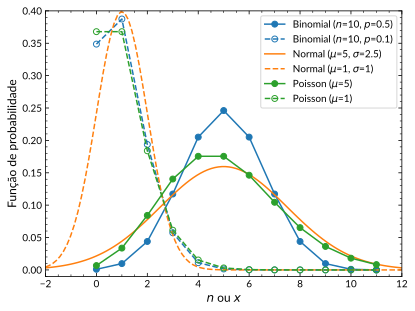

In [13]:
# Definição de arrays para valores de n e x
n: np.ndarray = np.arange(0, 12)            # Valores inteiros para distribuições discretas
x: np.ndarray = np.linspace(-2, 12, 100)    # Valores contínuos para distribuições contínuas

# Função de Massa de Probabilidade (FMP) para a distribuição binomial
fmp1: np.ndarray = binom.pmf(n, n=10, p=0.5) 
fmp2: np.ndarray = binom.pmf(n, n=10, p=0.1) 

# Função Densidade de Probabilidade (FDP) para a distribuição normal
normal1: np.ndarray = norm.pdf(x, loc=5, scale=2.5)
normal2: np.ndarray = norm.pdf(x, loc=1, scale=1.0)

# Função de Massa de Probabilidade (FMP) para a distribuição de Poisson
poisson1: np.ndarray = poisson.pmf(n, mu=5)  
poisson2: np.ndarray = poisson.pmf(n, mu=1) 

# Criação de um subplot para os gráficos
_, ax = plt.subplots()
ax.plot(n, fmp1, "-o", label="Binomial ($n$=10, $p$=0.5)", c="tab:blue")
ax.plot(n, fmp2, "--o", label="Binomial ($n$=10, $p$=0.1)", c="tab:blue", mfc='none')
ax.plot(x, normal1, label="Normal ($\mu$=5, $\sigma$=2.5)", c="tab:orange")
ax.plot(x, normal2, "--", label="Normal ($\mu$=1, $\sigma$=1)", c="tab:orange")
ax.plot(n, poisson1, "-o", label="Poisson ($\mu$=5)", c="tab:green")
ax.plot(n, poisson2, "--o", label="Poisson ($\mu$=1)", c="tab:green", mfc='none')

ax.set(xlabel="$n$ ou $x$", ylabel="Função de probabilidade")
ax.axis([-2, 12, -0.01, 0.4])

plt.legend()
plt.savefig("../../tex-statistics/Figuras/3-4.pdf", bbox_inches="tight");